In [1]:
#necessary libraries are added here
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import svm

In [2]:
#reading header from the adult.names file. Same header is used for both train and test data
dataHeader = pd.read_csv('adult.names', sep=":", header=None).iloc[:,0:1].loc[:,0].tolist()

In [3]:
#the given adult.name doesnt have a name for the target attribute. We consider the taget attribute name to be 'y'
dataHeader
if (len(dataHeader) == 14):
    dataHeader.append('y')

In [4]:
#reading train data
#replacing all unknown values i.e '?' with NaN
#dataHeader is considered as the feature names
datatrain = pd.read_csv('adultTrain.data', header=None, names=dataHeader, na_values=np.NaN, sep=',\s+').replace('?', np.NaN)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [5]:
#reading test data
#replacing all unknown values i.e '?' with NaN
#dataHeader is considered as the feature names
datatest = pd.read_csv('adultTest.data', header=None, names=dataHeader, na_values=np.NaN, sep=',\s+').replace('?', np.NaN)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [6]:
#method to clean the dataset
#based on the datatype of the attribute, the NaN values are replaced with standard values
#if datatype is object, replaced with empty string
#if datatype is int64, replaced with rounded off mean value
#if datatype is float64, replaced with meanvalue
def cleanDataFrame(data):
    for i in range(0, data.shape[1]):
        colValues = data.iloc[:,i:i+1].iloc[:,0]
        colType = data.iloc[:,i:i+1].iloc[:,0].dtype
        if colType == 'int64':
            data.iloc[:,i:i+1] = data.iloc[:,i:i+1].fillna(round(colValues.mean()))
        elif colType == 'float64':
            data.iloc[:,i:i+1] = data.iloc[:,i:i+1].fillna(colValues.mean())        
        elif colType == 'object':
            data.iloc[:,i:i+1] = data.iloc[:,i:i+1].fillna('')            
    data['y'] = data['y'].str.strip().str.replace('.', '')           

In [7]:
#cleaning both test and train data by calling the defined function
cleanDataFrame(datatrain)
cleanDataFrame(datatest)

In [8]:
#method to create dummy variables
def changeToCategoryType(data):
    for header in dataHeader:
        if(header!='y'):
            data[header] = data[header].astype('category').cat.codes

In [9]:
#calling the defined method to change values to dummy values
changeToCategoryType(datatest)
changeToCategoryType(datatrain)

In [10]:
#Scaling the input data
#makes the algorithm converge faster
#We use a built in function to do this.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# This command 'tunes' the scaler to the train predictors ...
#Splitting original train data to feature list and target list.
X_train = datatrain.iloc[:,0:14]
y_train = datatrain.iloc[:,14:15].iloc[:,0]
scaler.fit(X_train)
#Splitting original test data to feature list and target list.
X_test = datatest.iloc[:,0:14]
y_test = datatest.iloc[:,14:15].iloc[:,0]

In [11]:
# Now use the scaler to scale both test and train predictors
# Now apply the transformations to the dataS:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [13]:
#method to build neural network and print its confusion matrix and accuracy of both train and test data
def createNeuralNetwork():
    print('Neural Network Metrics\n')
    #Here we configure the architecure. These are hidden layers only
    #The function will automatically create input nodes (one for each variable) and 
    #one output node (for the target value)
    mlp = MLPClassifier(hidden_layer_sizes=(20), max_iter=100, activation = 'logistic')
    #Fit the model...learn the weights
    mlp.fit(X_train,y_train)
    #The activation method is called 'relu' which stands for "rectified linear unit' - it is 
    #a line model. Let's now use the model to predict the target:
    predictions_train = mlp.predict(X_train)
    predictions_test = mlp.predict(X_test)
    plt.figure()
    class_names = datatrain['y'].unique()
    plot_confusion_matrix(confusion_matrix(y_train, predictions_train), classes=class_names,
                      title='Train Data Confusion Matrix')
    #Building and printing confusion matrix and accuracy score of train and test data
    print('Train Data Accuracy Score: ', mlp.score(X_train,y_train))
    plot_confusion_matrix(confusion_matrix(y_test, predictions_test), classes=class_names,
                      title='Test Data Confusion Matrix')
    print('Test Data Accuracy Score: ', mlp.score(X_test,y_test))

Neural Network Metrics



/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


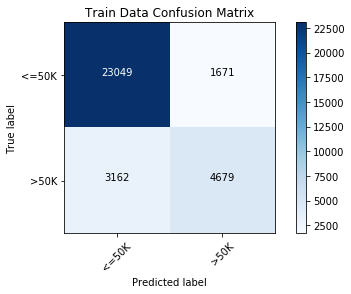

Train Data Accuracy Score:  0.8515708977


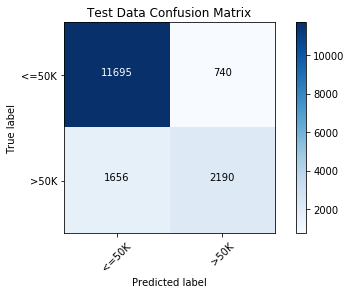

Test Data Accuracy Score:  0.85283459247


In [14]:
createNeuralNetwork()

In [15]:
#method to build Linear SVM and print its confusion matrix and accuracy of both train and test data
def createLinearSVM(): 
    print('Linear SVM Metrics\n')
    #Here we configure the architecure. These are hidden layers only
    svc_linear = svm.SVC(kernel='linear', C=1)
    #Fit the model
    svc_linear.fit(X_train, y_train)
    predicted_train = svc_linear.predict(X_train)
    predicted_test = svc_linear.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, predicted_test)
    class_names = datatrain['y'].unique()
    plot_confusion_matrix(confusion_matrix(y_train, predicted_train), classes=class_names,
                      title='Train Data Confusion Matrix')
    print('Train Data Accuracy Score: ', svc_linear.score(X_train,y_train))
    plot_confusion_matrix(confusion_matrix(y_test, predicted_test), classes=class_names,
                      title='Test Data Confusion Matrix')
    print('Test Data Accuracy Score: ', svc_linear.score(X_test,y_test))

Linear SVM Metrics



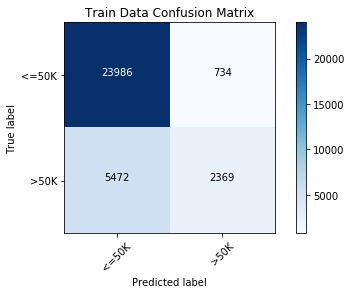

Train Data Accuracy Score:  0.809403888087


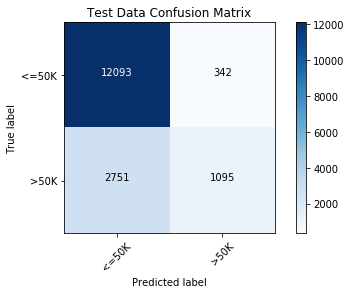

Test Data Accuracy Score:  0.810023954303


In [16]:
createLinearSVM()

In [ ]:
#method to build Radial SVM and print its confusion matrix and accuracy of both train and test data
def createRadialSVM(): 
    print('Radial SVM Metrics\n')
    #Here we configure the architecure. These are hidden layers only
    svc_radial = svm.SVC(gamma = 0.1)
    #Fit the model
    svc_radial.fit(X_train, y_train)
    predicted_train = svc_radial.predict(X_train)
    predicted_test = svc_radial.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, predicted_test)
    class_names = datatrain['y'].unique()
    plot_confusion_matrix(confusion_matrix(y_train, predicted_train), classes=class_names,
                      title='Train Data Confusion Matrix')
    print('Train Data Accuracy Score: ', svc_radial.score(X_train,y_train))
    plot_confusion_matrix(confusion_matrix(y_test, predicted_test), classes=class_names,
                      title='Test Data Confusion Matrix')
    print('Test Data Accuracy Score: ', svc_radial.score(X_test,y_test))

Radial SVM Metrics



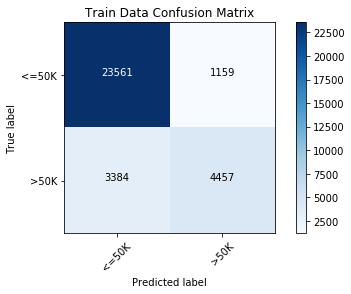

Train Data Accuracy Score:  0.860477258069


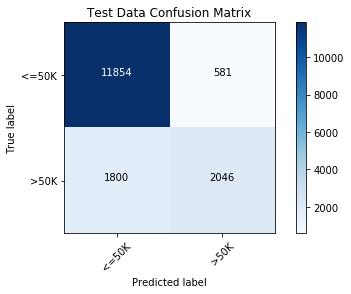

In [ ]:
createRadialSVM()

In [ ]:
#method to build Radial SVM and print its confusion matrix and accuracy of both train and test data
#we got the best accuracy score with k value as 6
def createKNN():
    print('KNN with k=6 Metrics\n')
    KNN = KNeighborsClassifier(n_neighbors=6)
    KNN.fit(X_train,y_train)
    predicted_train = KNN.predict(X_train)
    predicted_test = KNN.predict(X_test)
    class_names = datatrain['y'].unique()
    plot_confusion_matrix(confusion_matrix(y_train, predicted_train), classes=class_names,
                      title='Train Data Confusion Matrix')
    print('Train Data Accuracy Score: ', KNN.score(X_train,y_train))
    plot_confusion_matrix(confusion_matrix(y_test, predicted_test), classes=class_names,
                      title='Test Data Confusion Matrix')
    print('Test Data Accuracy Score: ', KNN.score(X_test,y_test))

In [ ]:
createKNN()